# Shape Conventions

It's worth defining some shape/indexing conventions in pandora-sat, because we're likely to get confused


Python is *row major*.

In [1]:
import numpy as np
ar = np.ones((10, 15))

In [2]:
ar.shape

(10, 15)

In the above matrix there are 10 *rows* and 15 *columns*

In [3]:
ar[0].shape

(15,)

Indexing into the array above gives you the first *row* with 15 elements, because there are 15 *columns*

We can use `numpy`'s `meshgrid` function to create arrays that show our *row* and *column* position. However, to make this behave in the way above, we'll need to pass indexing as `'ij'`:

In [4]:
Row, Column = np.meshgrid(np.arange(10), np.arange(15), indexing='ij')

Now these have the correct shape:

In [5]:
Row.shape, Column.shape

((10, 15), (10, 15))

The first index of `Row` gives us the *row* values at each *column*

In [6]:
Row[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The first index of `Column` gives us the *column* values across the first *row*

In [7]:
Column[1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

This is the default behavior of the similar `mgrid` function

In [8]:
Row, Column = np.mgrid[:10, :15]
print(Row.shape)
print(Row[0])

(10, 15)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Note that some Python functions don't quite follow these conventions, for example `pandora-sat` commonly uses `pcolormesh` to plot arrays, which expects the first element to be the *column* position.

Text(0, 0.5, 'Row')

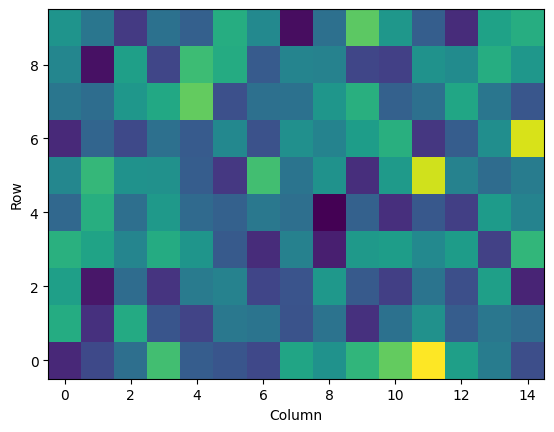

In [9]:
import matplotlib.pyplot as plt
data = np.random.normal(size=(10, 15))
plt.pcolormesh(Column, Row, data)
plt.xlabel('Column')
plt.ylabel('Row')

In Pandora we have detectors that also have *rows* and *columns*. On the IR side we have a tall, thin subarray on the edge of the detector that is going to be 400 *rows* tall and 80 *columns* wide. This means it has shape

```python
(400, 80)
```

**Note:** *rows* go along the vertical direction, and so sometimes we might call this variable `y` or `Y`. *columns* go in the horizontal direction, so sometimes we might call this variable `x` or `X`

Unfortunately we also like to use *RA* and *Dec*. *RA* tends to go in the horizontal direction (like *rows*), and *Dec* tends to go in the vertical direction (like *columns*). This adds potential confusion.

When we're giving positions into `pandora-sat`, we'll use the following conventions:
```python
func(RA, Dec) 
func(row, column)
func(y, x)
```

If these functions return images on the detector, they would return arrays with shape
```
(nrows, ncolumns)
```

# World Coordinate Systems

Note while `numpy` and `Python` are **row-major**, however `FITS-WCS` which is used by `astropy` is **column-major**.

CRPIX1 refers to the column value, CRPIX2 refers to the row value. For a FITS file with NAXIS1, NAXIS2 = [3,4], the corresponding `numpy` array would have shape [4,3]

Because of this we have to be careful about passing values back and forth. That's why there are helper functions `world_to_pixel` and `pixel_to_world` in `Detector` class objects.